# Basic diagnostic plots of the full forcing runs
## Large scale circulation (large domain, small domain, woa)
### Annual average barotropic circulation and sea surface height
Derived from monthly averages of the last year of integration (year 5)

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys

# add the 'src' directory as one where we can import modules
src_vis_dir = os.path.join(os.getcwd(), os.pardir, 'src','visualization')
src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)
sys.path.append(src_vis_dir)

# import my method from the source code

import uv_vectorplot
import timeseries_pdt
%aimport uv_vectorplot
%aimport timeseries_pdt

/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


initialize and fill up the arrays


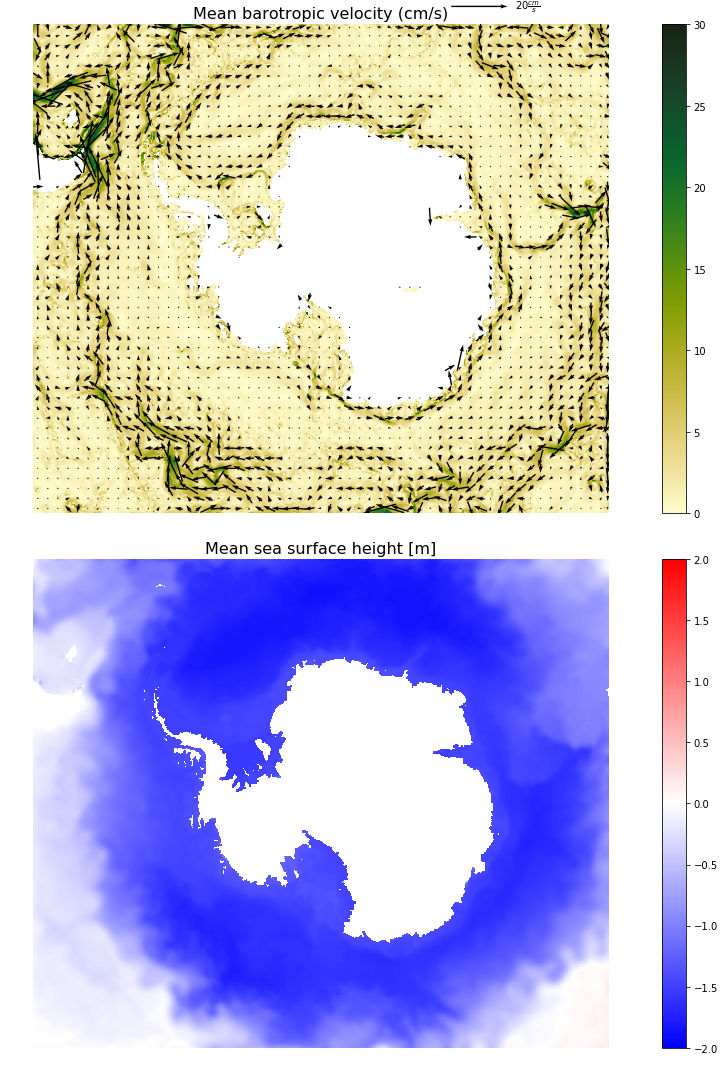

In [2]:
path_l_avg = '../data/raw/waom10_POT10/ocean_avg_0005.nc'
uv_vectorplot.plot_avg(path_l_avg,0,11)

initialize and fill up the arrays


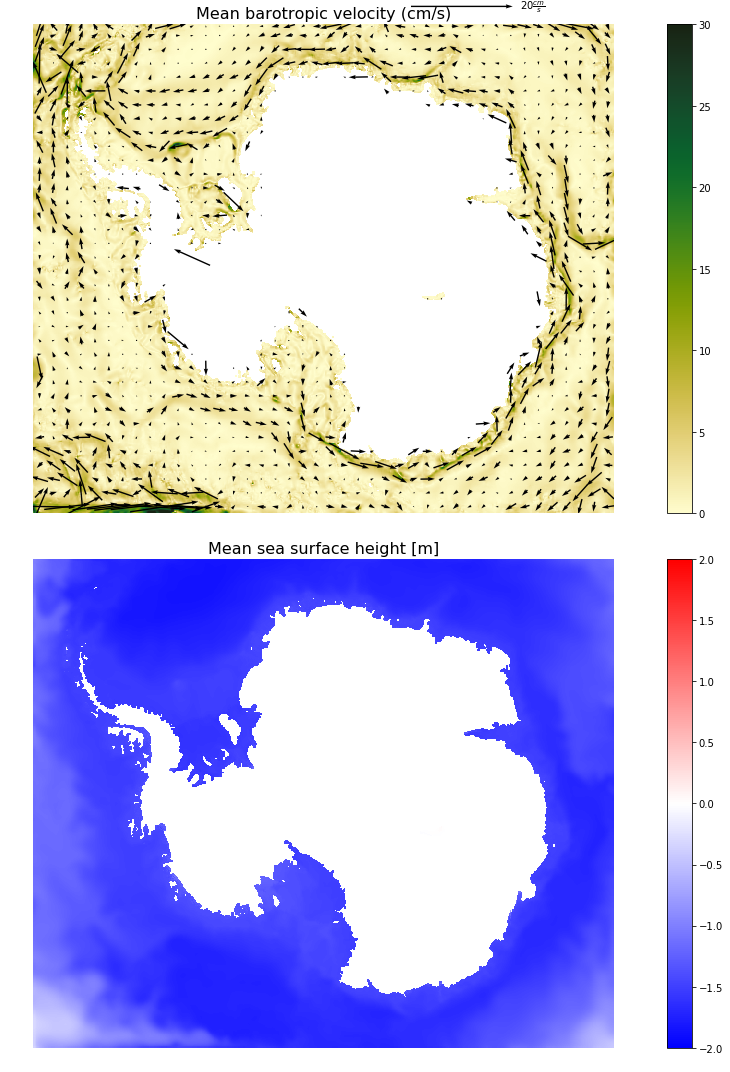

In [3]:
path_s_avg = '../data/raw/ROMSIceShelf_devel/ocean_avg_0005.nc'
uv_vectorplot.plot_avg(path_s_avg,0,11)

### Drake passage transport ... function not trustworthy

Reading grid
Reading data
Rotating velocity vector
interpolate everything to dp coordinates
mean dy: 11119.4926645
Plotting


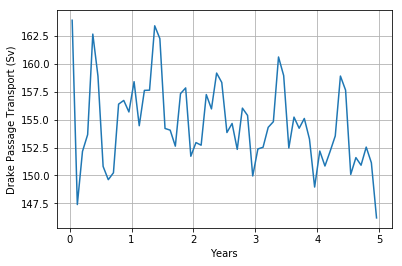

In [38]:
path_l_avg_all = '../data/raw/waom10_POT10/ocean_avg_0001-0005.nc'
timeseries_pdt.plot_dpt(path_l_avg_all)

## Tides
### Hourly snapshots covering one day of barotropic circulation and sea surface height
Full forcing two years spin up without tides, then activating tides without ramping and writing hourly output for 14 days. Plots below show hourly snapshots of day 14.

In [17]:
path_l_hourly = '../data/raw/waom10_POT10/ocean_his_hourly_0005.nc'
uv_vectorplot.plot_widget(path_l_hourly,341,365)

read in the data
initialize and fill up the arrays


### Compare amplitudes and phases in weddell, ross, bellinghausen and davis sea against ATG-Database

In [229]:
import ttide as tt
import numpy as np
import extract_zeta as ez
import imp
imp.reload(ez)
import scipy.io as sio

def read_atg(path_atgmat,site_id):
    mat_content = sio.loadmat(atg_path)
    atg_data = mat_content['atg']
    tide_data = {}
    for key in ['name','lat','lon','amp','Gphase']:
        tide_data[key] =np.squeeze(atg_data[key][0,0][site_id-1])
        tide_data['constit']=np.squeeze(atg_data['constit'][0,0][:])
    tide_data['name'] = tide_data['name'].strip()
    return tide_data

In [255]:
path_atg = '../data/atg/ATG_ocean_height_2010_0908.mat'

tide_davis={}
tide_weddell = {}
tide_bellinghausen = {}
tide_ross = {}

tide_davis['area']="Davis sea"
tide_weddell['area']='Weddell sea'
tide_bellinghausen['area']='Bellinghausen Sea'
tide_ross['area']='Ross sea'

tide_davis['atg']=read_atg(path_atg,24)
tide_weddell['atg']=read_atg(atg_path,42)
tide_bellinghausen['atg'] = read_atg(atg_path,84)
tide_ross['atg'] = read_atg(atg_path,79)

tide_davis['roms_signal']=ez.extractZeta(path_l_hourly,tide_davis['atg']['lat'],tide_davis['atg']['lon'])
tide_weddell['roms_signal']=ez.extractZeta(path_l_hourly,tide_weddell['atg']['lat'],tide_weddell['atg']['lon'])
tide_bellinghausen['roms_signal']=ez.extractZeta(path_l_hourly,tide_bellinghausen['atg']['lat'],tide_bellinghausen['atg']['lon'])
tide_ross['roms_signal']=ez.extractZeta(path_l_hourly,tide_ross['atg']['lat'],tide_ross['atg']['lon'])

extract zeta ...
target lat, lon:  -68.45 77.967
nearest neighbour lat, lon:  -68.5117837548 78.0238675456
extract zeta ...
target lat, lon:  -76.583 -32.01
nearest neighbour lat, lon:  -76.4996376017 -31.9641632258
extract zeta ...
target lat, lon:  -66.75 -70.9998
nearest neighbour lat, lon:  -66.7644591858 -71.0693027774
extract zeta ...
target lat, lon:  -74.75 164.0
nearest neighbour lat, lon:  -74.8513677946 163.864411317


In [256]:
import datetime
  
tide_davis['t_tide']={}
tide_weddell['t_tide'] = {}
tide_bellinghausen['t_tide'] = {}
tide_ross['t_tide'] = {} 

tide_davis['t_tide']['raw']=tt.t_tide(tide_davis['roms_signal'],dt=1,stime=datetime.datetime(1984,8,1),lat=tide_davis['atg']['lat'],out_style=None)
tide_weddell['t_tide']['raw']=tt.t_tide(tide_weddell['roms_signal'],dt=1,stime=datetime.datetime(1984,8,1),lat=tide_weddell['atg']['lat'],out_style=None)
tide_bellinghausen['t_tide']['raw']=tt.t_tide(tide_bellinghausen['roms_signal'],dt=1,stime=datetime.datetime(1984,8,1),lat=tide_bellinghausen['atg']['lat'],out_style=None)
tide_ross['t_tide']['raw']=tt.t_tide(tide_ross['roms_signal'],dt=1,stime=datetime.datetime(1984,8,1),lat=tide_ross['atg']['lat'],out_style=None)

In [257]:
for sea in [tide_davis,tide_ross,tide_bellinghausen,tide_weddell]:
    sea['t_tide']['keys']=['amp','amp_err','Gphase','phase_err']
    for ind,con_bstr in enumerate(sea['t_tide']['raw']['nameu']):
        con_str = con_bstr.decode('UTF-8').strip()
        sea['t_tide'][con_str]=sea['t_tide']['raw']['tidecon'][ind]
        
    for ind,value in enumerate(sea['atg']['constit']):
        m2cm = 1.0/100.0
        amp = sea['atg']['amp'][ind]*m2cm
        Gphase = sea['atg']['Gphase'][ind]
        sea['atg'][value]=[amp,None,Gphase,None]
    del sea['atg']['Gphase']
    del sea['atg']['amp']

In [259]:
for sea in [tide_davis,tide_weddell,tide_bellinghausen,tide_ross]:
    print(sea['area'],' Station: ',sea['atg']['name'])
    print("Amp[m]:  atg   roms || Gphase[deg]:  atg     roms")
    for con in ['M2','S2','O1','K1']:
        print(con,":     %0.2f"%sea['atg'][con][0], " %0.2f"%sea['t_tide'][con][0],\
             '                 %0.2f'%sea['atg'][con][2]," %0.2f"%sea['t_tide'][con][2])

Davis sea  Station:  20100- Davis
Amp[m]:  atg   roms || Gphase[deg]:  atg     roms
M2 :     0.20  0.86                  208.51  196.40
S2 :     0.18  0.76                  307.09  303.27
O1 :     0.29  0.23                  269.02  287.09
K1 :     0.28  0.28                  276.98  108.23
Weddell sea  Station:  ROPEX M2
Amp[m]:  atg   roms || Gphase[deg]:  atg     roms
M2 :     0.77  1.79                  247.71  171.68
S2 :     0.52  1.11                  269.32  267.53
O1 :     0.32  0.18                  5.21  4.32
K1 :     0.32  0.07                  11.86  141.98
Bellinghausen Sea  Station:  Marguerite Bay A3
Amp[m]:  atg   roms || Gphase[deg]:  atg     roms
M2 :     0.12  0.81                  262.23  353.62
S2 :     0.14  0.66                  64.05  90.53
O1 :     0.25  0.15                  70.00  75.89
K1 :     0.29  0.16                  87.91  213.08
Ross sea  Station:  Terra Nova Bay Tide Gauge
Amp[m]:  atg   roms || Gphase[deg]:  atg     roms
M2 :     0.07  0.51        

## Stratification
### SST and SSS monthly evolution roms_avg vs. sose_clim

In [18]:
from sys import path
path.append('../data/external/sose/.')
import mds
import scipy.io as sio
import numpy as np

path_sst_sose = '../data/external/sose/THETA_mnthlyBar'
path_sss_sose = '../data/external/sose/SALT_mnthlyBar'
path_sose_grid = '../data/external/sose/grid.mat'
sst_sose_raw = mds.rdmds(path_sst_sose,itrs=np.NaN,returnmeta=True,lev=[0],fill_value=np.NaN)
sss_sose_raw = mds.rdmds(path_sss_sose,itrs=np.NaN,returnmeta=True,lev=[0],fill_value=np.NaN)
grid_sose = sio.loadmat(path_sose_grid)

/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


In [19]:
sst_sose_clim =np.mean(np.reshape(sst_sose_raw[0],(6,12,320,2160)),axis=0)
sss_sose_clim =np.mean(np.reshape(sss_sose_raw[0],(6,12,320,2160)),axis=0)

In [20]:
mask_sose_raw = grid_sose["maskCtrlC"]
mask_sose = np.tile(np.swapaxes(mask_sose_raw[:,:,0],0,1),(12,1,1))
sst_sose_clim_masked = np.ma.masked_where(mask_sose==0.0,sst_sose_clim)
sss_sose_clim_masked = np.ma.masked_where(mask_sose==0.0,sss_sose_clim)

In [21]:
from scipy.interpolate import RegularGridInterpolator
from netCDF4 import Dataset
id = Dataset(path_l_avg,'r')
sst_roms = id.variables["temp"][:,30,:,:]
sss_roms = id.variables["salt"][:,30,:,:]
lat_roms = id.variables['lat_rho'][:,:]
lon_roms = id.variables['lon_rho'][:,:]
id.close()

sst_sose_rg = np.ma.zeros((12,np.size(lat_roms,0),np.size(lat_roms,1)))
sss_sose_rg = np.ma.zeros((12,np.size(lat_roms,0),np.size(lat_roms,1)))
lon_sose_raw = grid_sose["XC"][:,0]
lon_sose_raw[lon_sose_raw>180] -=360
order = np.argsort(lon_sose_raw)
lon_sose = lon_sose_raw[order]
lat_sose = grid_sose["YC"][0,:]
print('Interpolating sst ...')
for month,sst in enumerate(sst_sose_clim_masked):
    data_sose = sst[:,order]
    interp_func = RegularGridInterpolator((lat_sose,lon_sose),data_sose,bounds_error=False, method="nearest",fill_value=0.0)
    sst_sose_rg[month] = interp_func((lat_roms,lon_roms))
sst_sose_rg.mask[sst_sose_rg.data==0.0] = True
print('Interpolating sss ...')
for month,sss in enumerate(sss_sose_clim_masked):
    data_sose = sss[:,order]
    interp_func = RegularGridInterpolator((lat_sose,lon_sose),data_sose,bounds_error=False, method="nearest",fill_value=0.0)
    sss_sose_rg[month] = interp_func((lat_roms,lon_roms))
sss_sose_rg.mask[sss_sose_rg.data==0.0] = True

Interpolating sst ...


/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:2461: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.
  result[out_of_bounds] = self.fill_value


Interpolating sss ...


In [22]:
sst_diff = sst_roms - sst_sose_rg
sss_diff = sss_roms - sss_sose_rg

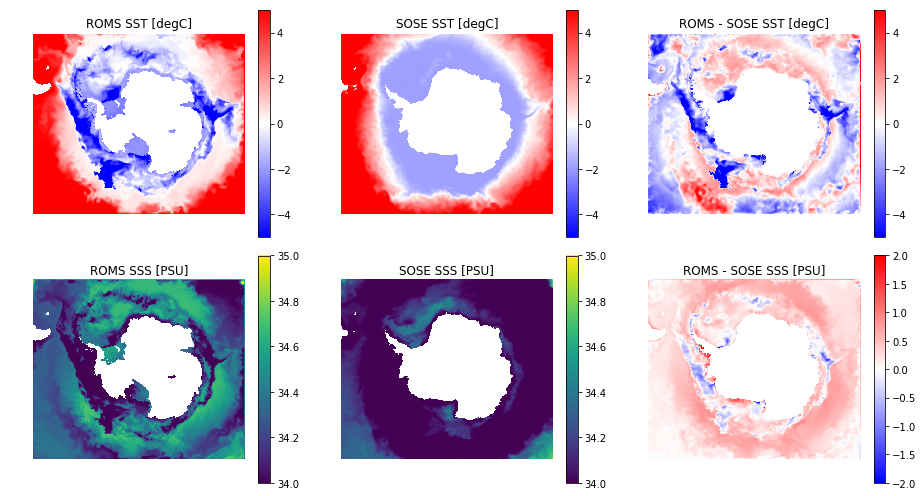

<function __main__.plot>

In [23]:
from ipywidgets import interact
import matplotlib.pyplot as plt

def plot(month):
    
    fig,axes = plt.subplots(2,3,figsize=(13,7))
    
    rsst= axes[0,0].pcolormesh(sst_roms[month],vmin=-5,vmax=5,cmap=plt.cm.bwr)
    axes[0,0].set_title("ROMS SST [degC]",fontsize=12)
    plt.colorbar(rsst,ax=axes[0,0])
    axes[0,0].set_aspect('equal')
    axes[0,0].axis('off')

    ssst = axes[0,1].pcolormesh(sst_sose_rg[month],vmin=-5,vmax=5,cmap=plt.cm.bwr)
    axes[0,1].set_title("SOSE SST [degC]",fontsize=12)
    plt.colorbar(ssst,ax=axes[0,1])
    axes[0,1].set_aspect('equal')
    axes[0,1].axis('off')
    
    dsst = axes[0,2].pcolormesh(sst_diff[month],vmin=-5,vmax=5,cmap=plt.cm.bwr)
    axes[0,2].set_title("ROMS - SOSE SST [degC]",fontsize=12)
    plt.colorbar(dsst,ax=axes[0,2])
    axes[0,2].set_aspect('equal')
    axes[0,2].axis('off')
    
    rsss= axes[1,0].pcolormesh(sss_roms[month],vmin=34,vmax=35)
    axes[1,0].set_title("ROMS SSS [PSU]",fontsize=12)
    plt.colorbar(rsss,ax=axes[1,0])
    axes[1,0].set_aspect('equal')
    axes[1,0].axis('off')
    
    ssss = axes[1,1].pcolormesh(sss_sose_rg[month],vmin=34,vmax=35)
    axes[1,1].set_title("SOSE SSS [PSU]",fontsize=12)
    plt.colorbar(ssss,ax=axes[1,1])
    axes[1,1].set_aspect('equal')
    axes[1,1].axis('off')
    
    dsss = axes[1,2].pcolormesh(sss_diff[month],vmin=-2,vmax=2,cmap=plt.cm.bwr)
    axes[1,2].set_title("ROMS - SOSE SSS [PSU]",fontsize=12)
    plt.colorbar(dsss,ax=axes[1,2])
    axes[1,2].set_aspect('equal')
    axes[1,2].axis('off')

    plt.tight_layout()
    
    plt.show()
        
interact(plot,month=(0,11))

### Vertical transsects

In [48]:
# load roms, calculate depths and append to dataset
import calc_z
import plot_vslice
%aimport plot_vslice
path_l_avg = '../data/raw/waom10_POT10/ocean_avg_0005.nc'
ds = xr.open_dataset(path_l_avg)

z=np.empty(ds.temp.shape)
for step in np.arange(ds.ocean_time.size):
    z[step],s,C = calc_z.calc_z(ds.h.values,ds.zice[step].values,ds.theta_s.values,ds.theta_b.values,ds.hc.values,31,ds.zeta[step].values)
ds['temp']=ds.temp.assign_coords(depth=xr.DataArray(z,dims=['ocean_time','s_rho','eta_rho','xi_rho']))

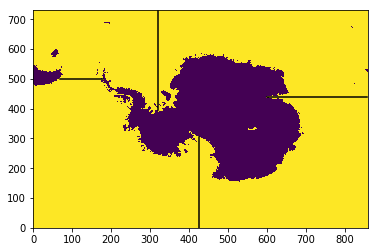

In [45]:
plt.pcolormesh(ds.mask_rho)

#linescodeline = [k_min,k_max,i_min,j_min,i_max,j_max]
amery=[0,-1,600,440,859,440,"amery"]
ross=[0,-1,427,0,427,305,"ross"]
weddell=[0,-1,320,395,320,729,"weddel"]
drake=[0,-1,70,500,180,500,"drake"]

for line in [amery,ross,weddell,drake]:
    plt.plot((line[2],line[4]),(line[3],line[5]),"k-")
plt.show()

In [49]:
plot_vslice.plot_vslice?

/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


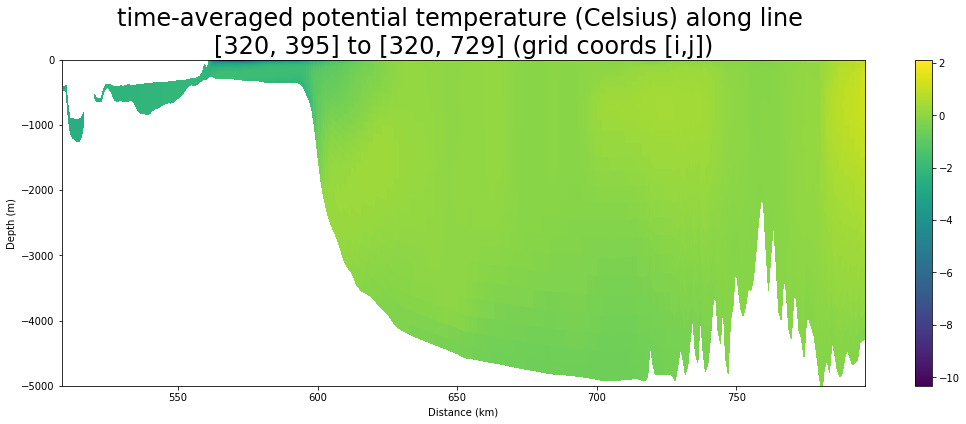

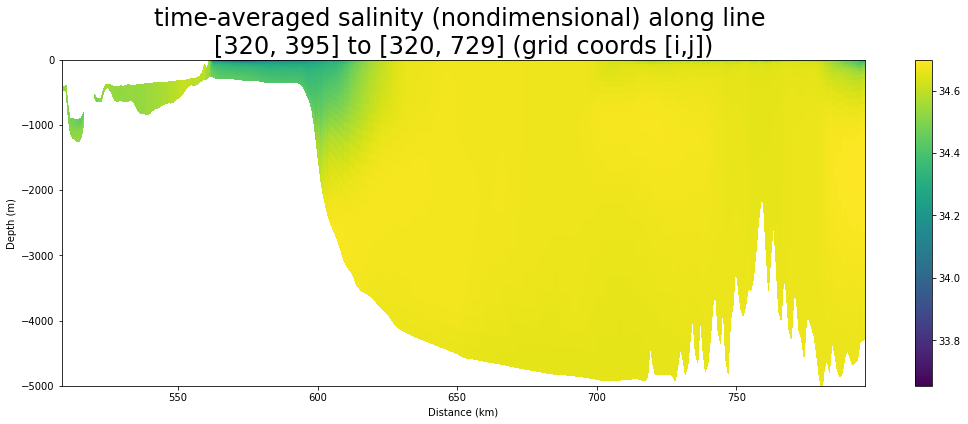

In [73]:
i_min,j_min,i_max,j_max=weddell[2:6]
plot_vslice.plot_vslice(path_l_avg,"temp",-5000,0,i_min,j_min,i_max,j_max,2,4,0.9,50,31)
plot_vslice.plot_vslice(path_l_avg,"salt",-5000,0,i_min,j_min,i_max,j_max,2,4,0.9,50,31)

### roms temp and salt monthly averages evolution along transsects

In [1]:
from sys import path
path.append('../toolBox/myTools/')
import tracer_evo_animation
import matplotlib.pyplot as plt
import netCDF4 as nc4
import numpy as np
import imp
imp.reload(tracer_evo_animation)

path_l_avg = '../data/raw/waom10_POT10/ocean_avg_0005.nc'

print("read in roms data ...")
id = nc4.Dataset(path_l_avg,'r')
mask_rho = id.variables['mask_rho'][:,:]
print('temp')
temp_rho = id.variables['temp'][:,:,:]
print('salt')
salt_rho = id.variables['salt'][:,:,:]
id.close()

read in roms data ...
temp
salt


In [6]:
trans = amery.copy()
tracer_evo_animation.tracer_evo_animation(path_l_avg,[path_l_avg],trans[0],trans[1],trans[2],trans[3],trans[4],trans[5])

Reading file: ../data/raw/waom10_POT10/ocean_avg_0005.nc
with 12 time records.
Getting amin and amax values of all times.
Building animation with 12 frames.


In [9]:
trans = weddell.copy()
tracer_evo_animation.tracer_evo_animation(path_l_avg,[path_l_avg],trans[0],trans[1],trans[2],trans[3],trans[4],trans[5])

Reading file: ../data/raw/waom10_POT10/ocean_avg_0005.nc
with 12 time records.
Getting amin and amax values of all times.
Building animation with 12 frames.


In [10]:
trans = drake.copy()
tracer_evo_animation.tracer_evo_animation(path_l_avg,[path_l_avg],trans[0],trans[1],trans[2],trans[3],trans[4],trans[5])

Reading file: ../data/raw/waom10_POT10/ocean_avg_0005.nc
with 12 time records.
Getting amin and amax values of all times.
Building animation with 12 frames.


In [11]:
trans = ross.copy()
tracer_evo_animation.tracer_evo_animation(path_l_avg,[path_l_avg],trans[0],trans[1],trans[2],trans[3],trans[4],trans[5])

Reading file: ../data/raw/waom10_POT10/ocean_avg_0005.nc
with 12 time records.
Getting amin and amax values of all times.
Building animation with 12 frames.
